In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import matplotlib.cm as cm
colormap = cm.get_cmap("hsv")

C:\Users\alexk\AppData\Local\Temp\ipykernel_32812\2988994069.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


In [7]:
m10_v10_L3_s3=torch.tensor([[[100.0000, 100.0000,  98.9362,  90.6911,  84.6154,  78.5714,  36.8421,
          100.0000,   0.0000,  12.8713,  96.3000],
         [100.0000,  99.6730,  99.0698,  81.5100,  71.4286,  33.3333,  45.0000,
            0.0000, 100.0000,  19.8630,  95.9400],
         [ 99.9495,  99.3881,  98.2759,  82.1870,  61.1940,   0.0000,  43.7500,
            0.0000,   0.0000,  12.5000,  96.4900],
         [ 99.8912,  97.4576,  73.5294,  85.8156,  57.1429,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.0600],
         [ 99.9156,  97.5871,  81.2500,  76.2887,  50.0000,   0.0000,   0.0000,
            0.0000,   0.0000,  13.0435,  99.3100],
         [ 99.8463,  97.7011,  90.9091,  72.2222, 100.0000,   0.0000,   0.0000,
            0.0000,   0.0000,  22.2222,  99.5500],
         [ 99.8584,  92.5926, 100.0000,  78.2609,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.6700],
         [ 99.9397,  91.8919,  33.3333,  62.5000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.8400],
         [ 99.9800,  86.6667,   0.0000,  83.3333,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.9400],
         [ 99.9300,  50.0000,   0.0000,  25.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.8900]],

        [[100.0000,  99.9012,  99.3827,  89.4361,  77.9891,  58.5653,  44.7291,
           28.1759,  20.0000,   5.7171,  60.9700],
         [100.0000,  97.6476,  89.5920,  80.1177,  67.2691,  55.0152,  35.9259,
           32.7103,  55.5556,   7.3264,  78.1900],
         [ 99.3773,  95.9968,  78.9311,  69.3966,  55.4731,  37.1795,  21.8045,
           20.9302,   0.0000,  16.7019,  84.3500],
         [ 98.8445,  93.6919,  82.9703,  68.4848,  50.0000,  32.8571,  31.1111,
           33.3333,   0.0000,   9.8361,  91.2800],
         [ 99.5670,  93.5506,  78.4053,  67.6471,  38.0597,  19.1489,  31.4286,
           13.3333,  80.0000,   8.4746,  94.8600],
         [ 99.6211,  94.9192,  85.1852,  70.5202,  46.0000,  17.3913,   0.0000,
           66.6667,   0.0000,   3.3333,  97.6600],
         [ 99.7750,  93.8614,  77.6119,  53.9683,  43.4783,  40.0000, 100.0000,
           50.0000,   0.0000,   0.0000,  98.8700],
         [ 99.9068,  95.2029,  90.0000,  51.5152,  50.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.5500],
         [ 99.8479,  90.3509,  72.7273,  62.5000, 100.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.6700],
         [ 99.9799,  95.0000, 100.0000,  50.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.9400]],

        [[100.0000, 100.0000, 100.0000,  85.7143,  73.0245,  63.7747,  47.5239,
           33.3550,  19.4290,   9.5669,  26.5900],
         [100.0000,  94.0397,  82.8784,  67.6259,  50.6014,  41.2138,  32.4124,
           25.8567,  15.2857,   8.0627,  32.7800],
         [ 91.0345,  84.6154,  72.8015,  58.3217,  48.3392,  35.3315,  23.4826,
           19.7531,  16.1290,   9.8302,  45.2600],
         [ 91.8529,  81.3965,  67.1738,  51.5333,  35.8420,  24.9668,  16.2544,
           14.4304,   9.0909,   8.2294,  55.6700],
         [ 97.6051,  87.4589,  71.4180,  54.4150,  36.8992,  24.7024,  23.6162,
           13.0435,  12.8571,  10.8108,  76.7300],
         [ 98.6778,  91.8985,  76.4638,  56.4961,  41.0000,  26.8966,  26.7327,
           15.7895,  11.1111,   0.0000,  89.2800],
         [ 99.4567,  93.0268,  80.0000,  61.6071,  50.5376,  52.7778,  22.2222,
           25.0000,   0.0000,   0.0000,  96.1900],
         [ 99.7111,  95.1389,  81.0000,  77.5510,  52.6316,  60.0000, 100.0000,
            0.0000,   0.0000,   0.0000,  98.7700],
         [ 99.8446,  94.3061,  75.4717,  70.0000,  66.6667, 100.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.5200],
         [ 99.9596,  97.7778,  81.8182,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.9200]],

        [[  0.0000,   0.0000,   0.0000, 100.0000, 100.0000,  96.7742,  77.1654,
           51.4834,  28.1668,   9.8949,  15.7600],
         [  0.0000,   0.0000,  80.0000,  75.6757,  54.7170,  48.6154,  33.8214,
           25.1236,  15.4040,   9.9156,  16.3100],
         [100.0000,  78.3784,  71.0526,  52.1614,  41.0095,  32.9151,  22.9050,
           17.8218,  13.7514,   9.5395,  20.4300],
         [ 77.9661,  67.3469,  53.5627,  41.4186,  32.3120,  24.9474,  18.6854,
           14.7568,  11.2264,  11.1558,  27.8000],
         [ 83.0255,  65.9686,  52.9271,  40.4700,  26.8750,  18.5641,  20.0762,
           13.0952,   8.6957,  11.2994,  42.6600],
         [ 96.2074,  85.8672,  70.6203,  53.5253,  47.5575,  32.2966,  24.8980,
           21.7391,  21.7391,   0.0000,  76.6800],
         [ 99.1571,  94.0097,  85.2975,  74.7368,  72.6257,  64.2857,  40.0000,
            0.0000,   0.0000,   0.0000,  95.2600],
         [ 99.9321,  98.2739,  93.1915,  80.0000,  80.0000, 100.0000, 100.0000,
            0.0000,   0.0000,   0.0000,  99.5200],
         [ 99.9083,  99.4083,  93.7500, 100.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.8900],
         [ 99.9800, 100.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.9800]],

        [[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  50.0000,  62.5000,
           48.0769,  22.4172,   9.0382,  10.4700],
         [  0.0000,   0.0000,   0.0000,  50.0000,  83.3333,  62.8571,  43.6242,
           25.5639,  16.0781,   9.9056,  12.3000],
         [100.0000,   0.0000, 100.0000,  65.5172,  58.7629,  42.9688,  29.4586,
           19.7015,  15.8771,  10.1113,  15.4900],
         [ 66.6667,  60.0000,  46.1538,  41.6382,  38.2979,  28.2220,  22.2795,
           17.5983,  13.0156,   9.9864,  19.2800],
         [ 70.5628,  52.4618,  43.0862,  35.3218,  27.0327,  22.9153,  18.2561,
           14.2974,  12.8606,  12.2995,  26.9700],
         [ 87.1977,  75.0940,  61.2939,  49.6204,  41.1656,  31.9718,  28.6385,
           21.2435,   8.4507,  33.3333,  61.1800],
         [ 98.9319,  94.9129,  90.5784,  83.2500,  74.0506,  75.9259,  61.5385,
            0.0000, 100.0000,   0.0000,  95.9900],
         [ 99.8707,  98.5577,  97.7273,  90.0000, 100.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.7600],
         [ 99.9900, 100.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.9900],
         [100.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000, 100.0000]],

        [[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  80.0000,
           52.6316,  26.1682,   9.4016,   9.9600],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000,  45.4545,
           27.4510,  19.4570,   9.4123,  10.3200],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  72.7273,  30.7692,
           22.8643,  14.3971,   9.5262,  11.1300],
         [  0.0000,   0.0000, 100.0000,  40.0000,  32.1429,  29.4574,  22.1612,
           18.1634,  12.5226,   9.4973,  12.8200],
         [  0.0000,  12.5000,  34.0909,  23.9024,  26.8868,  17.9913,  16.1922,
           12.5138,  10.2799,   7.6155,  14.5100],
         [ 40.8889,  30.6206,  29.5124,  21.5259,  19.5499,  16.9529,  14.5663,
           12.6374,  17.2414,   0.0000,  22.7600],
         [ 97.6806,  96.9731,  94.0816,  95.2381, 100.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  97.3000],
         [100.0000, 100.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000, 100.0000],
         [100.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000, 100.0000],
         [100.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000, 100.0000]]])
m10_v10_L3_s3_trial10=torch.tensor([[[100.0000,  97.1575,  94.4173,  79.3245,  72.3733,  61.7677,  48.7461,
           35.8333,  10.0000,   7.2656,  89.5000],
         [ 99.9941,  98.6174,  95.0108,  75.9397,  63.2032,  60.6850,  34.7420,
           33.3333,   0.0000,   6.1609,  94.8850],
         [ 99.8431,  97.7890,  89.6882,  75.6160,  59.7693,  55.0000,  34.0758,
           20.0000,   0.0000,   7.8777,  96.7110],
         [ 99.7961,  96.9732,  84.2892,  67.1901,  48.1897,   3.3333,  22.0000,
            0.0000,   0.0000,   8.0699,  98.3270],
         [ 99.8929,  97.4275,  86.7653,  79.6938,  56.7778,  20.0000,  15.0000,
            0.0000,   0.0000,   7.0852,  99.3740],
         [ 99.8995,  96.4765,  74.7063,  77.4998,  42.8095,  10.0000,  20.0000,
            0.0000,   0.0000,   7.6349,  99.6180],
         [ 99.8645,  95.0961,  72.1667,  68.4436,  20.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   7.2619,  99.7310],
         [ 99.9437,  94.2267,  60.0000,  76.6310,  40.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   2.5000,  99.8850],
         [ 99.9569,  95.0794,  35.0000,  62.7778,  10.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.9270],
         [ 99.9730,  96.6667,  10.0000,  58.3333,  10.0000,   0.0000,   0.0000,
            0.0000,   0.0000,  10.0000,  99.9610]],

        [[ 98.7218,  97.6409,  93.3768,  82.8847,  70.4195,  59.3611,  41.8399,
           28.2607,  20.0850,   7.6829,  65.6690],
         [ 99.4150,  97.1997,  92.2531,  78.4503,  66.7143,  53.2354,  35.7860,
           26.9247,  17.4062,   6.7784,  79.1130],
         [ 99.3307,  96.3125,  88.1948,  72.5707,  55.0460,  37.9296,  27.6641,
           21.7172,   8.4075,   9.5005,  86.3140],
         [ 99.4215,  95.7438,  84.7730,  71.5073,  53.8538,  38.3559,  27.5420,
           22.0843,  13.6667,  12.0824,  92.2730],
         [ 99.6535,  96.0994,  85.9971,  72.0398,  48.6036,  36.7794,  25.2658,
           19.0125,   9.1667,  10.5946,  96.0950],
         [ 99.7240,  96.1206,  86.1976,  69.9667,  47.9044,  39.3214,  19.8301,
           21.2857,   0.0000,   5.2018,  98.0410],
         [ 99.7702,  95.0312,  83.5528,  65.1099,  46.1349,  49.2323,  26.9722,
           22.8333,   0.0000,   0.0000,  99.0310],
         [ 99.8822,  94.6682,  82.5789,  67.8594,  61.9643,  36.1667,  31.6667,
           10.0000,   0.0000,   0.0000,  99.5660],
         [ 99.9229,  93.7443,  80.0272,  64.2886,  53.3333,   5.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.7770],
         [ 99.9617,  92.3572,  85.1667,  65.4167,  20.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.9000]],

        [[100.0000,  95.7970,  92.3108,  85.3093,  74.0776,  59.2505,  45.3405,
           32.5210,  20.6231,   8.9730,  24.7270],
         [ 98.2351,  91.5573,  84.9351,  72.5564,  59.3624,  46.4304,  33.5728,
           22.7726,  15.5830,   9.8443,  36.6760],
         [ 96.3748,  89.0169,  79.2388,  66.5655,  52.7549,  39.1593,  28.5703,
           18.8975,  13.1247,   8.8372,  49.4280],
         [ 95.5426,  87.3862,  74.7075,  59.8816,  44.5179,  33.2224,  23.6742,
           17.0153,  12.5024,  11.2525,  62.9350],
         [ 98.4701,  92.7479,  82.2579,  67.8944,  51.4522,  38.3669,  28.9542,
           21.5204,  14.9560,  10.9955,  82.1090],
         [ 99.4030,  95.3566,  87.4691,  74.0584,  60.2559,  49.4654,  37.4446,
           30.7885,  24.1908,   9.9359,  93.2620],
         [ 99.7567,  96.7127,  90.3842,  79.9481,  66.9940,  55.2874,  44.0097,
           57.3413,  25.0000,   3.3333,  97.8670],
         [ 99.8893,  97.2784,  92.3132,  84.6795,  73.7446,  72.0000,  33.3333,
            0.0000,   0.0000,   0.0000,  99.4100],
         [ 99.9461,  97.6339,  91.8862,  86.1548,  55.0000,  10.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.8150],
         [ 99.9778,  98.2794,  89.9112,  50.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.9520]],

        [[  0.0000,  10.0000,  60.0000,  90.0000,  85.6981,  70.3913,  55.8436,
           37.1043,  20.6904,   9.5506,  13.4160],
         [ 30.0000,  73.3333,  83.3969,  75.0431,  61.3114,  47.1554,  35.3845,
           24.4584,  15.4752,   9.8432,  16.4530],
         [ 85.4603,  75.2109,  67.1348,  55.5980,  43.5880,  34.6001,  25.7905,
           19.5826,  13.7678,  10.0031,  21.7480],
         [ 84.3706,  71.9950,  60.3726,  48.7267,  38.0244,  29.0670,  21.7405,
           16.2752,  12.6809,  10.6005,  31.8180],
         [ 93.2670,  84.2016,  71.9375,  58.5471,  45.9079,  34.4856,  27.1079,
           20.4372,  17.1661,  13.3925,  57.8440],
         [ 99.0964,  95.6889,  89.9798,  80.7583,  70.5748,  58.8691,  50.1331,
           40.2850,  31.7040,  20.6952,  89.1790],
         [ 99.8032,  98.4581,  94.8747,  89.5747,  82.9987,  75.0410,  70.4207,
           58.8333,  51.6667,  10.0000,  98.1880],
         [ 99.9422,  98.9034,  96.9364,  92.5711,  91.5771,  85.0000,  20.0000,
            0.0000,   0.0000,   0.0000,  99.7330],
         [ 99.9836,  99.7477,  99.3333,  60.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.9780],
         [ 99.9990, 100.0000,  10.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.9990]],

        [[  0.0000,   0.0000,   0.0000,   0.0000,  30.0000,  62.0556,  51.1764,
           36.0091,  21.4383,   9.7330,  10.8610],
         [  0.0000,  10.0000,  20.0000,  62.5000,  58.1488,  41.3656,  34.8044,
           24.6635,  15.9593,   9.4151,  11.4600],
         [  0.0000,  41.6667,  57.7143,  44.1709,  37.8844,  29.2795,  24.4530,
           17.9421,  13.0374,   9.6966,  13.1770],
         [ 57.4048,  53.3774,  47.5055,  36.5386,  31.3781,  24.6540,  18.8072,
           15.0981,  12.0514,   9.8645,  17.0640],
         [ 67.2614,  56.3048,  46.7799,  38.0699,  30.1695,  24.6933,  20.0347,
           15.1670,  12.4085,  11.1279,  29.0340],
         [ 98.0861,  94.8353,  90.0899,  83.4990,  75.2942,  68.6812,  60.2040,
           54.4055,  44.0489,  43.1772,  86.2530],
         [ 99.8822,  99.2752,  98.0431,  96.2216,  94.9356,  92.1386,  85.5654,
           76.6667,   0.0000,   0.0000,  99.2610],
         [ 99.9655,  99.6523,  99.2041, 100.0000,  60.0000,  10.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.9390],
         [ 99.9970,  99.3750,  20.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.9960],
         [100.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000, 100.0000]],

        [[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  10.0000,  62.1667,
           38.3515,  22.9389,   9.8949,  10.2680],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  15.0000,  36.5397,
           25.3541,  16.0512,   9.9584,  10.5490],
         [  0.0000,   0.0000,   0.0000,   0.0000,  20.0000,  33.0383,  26.0052,
           18.1229,  13.9930,   9.8911,  11.0900],
         [  0.0000,  10.0000,  30.0000,  30.0000,  32.6567,  26.3733,  21.2325,
           16.5005,  12.4509,   9.9757,  12.6470],
         [  0.0000,  47.8911,  31.7897,  30.3226,  23.8181,  20.8186,  17.8133,
           14.7112,  12.3522,  11.3090,  16.5210],
         [ 87.6601,  84.8983,  81.9456,  78.2399,  75.0124,  71.3997,  67.2457,
           61.7458,  63.3172,  50.1667,  77.1160],
         [ 99.8874,  99.7895,  99.7380,  99.6733,  98.8889,  20.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.8520],
         [ 99.9970,  90.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,  99.9970],
         [100.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000, 100.0000],
         [100.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000, 100.0000]]])

m10_v10_L3_s3_trial10_test_size=torch.tensor([[[5.8597e+03, 1.9542e+03, 2.9130e+02, 9.1650e+02, 2.0020e+02,
          1.9300e+01, 4.1200e+01, 3.8000e+00, 2.0000e-01, 7.1360e+02],
         [6.8483e+03, 1.8694e+03, 2.1860e+02, 6.4920e+02, 1.0480e+02,
          8.7000e+00, 1.9000e+01, 2.0000e+00, 0.0000e+00, 2.8000e+02],
         [7.8631e+03, 1.3619e+03, 1.1370e+02, 4.4440e+02, 5.4200e+01,
          3.9000e+00, 8.6000e+00, 9.0000e-01, 0.0000e+00, 1.4930e+02],
         [9.0795e+03, 6.3850e+02, 2.7700e+01, 1.7300e+02, 1.3300e+01,
          1.4000e+00, 2.7000e+00, 4.0000e-01, 0.0000e+00, 6.3500e+01],
         [9.5318e+03, 3.3610e+02, 1.3700e+01, 8.9600e+01, 5.9000e+00,
          5.0000e-01, 1.2000e+00, 1.0000e-01, 0.0000e+00, 2.1100e+01],
         [9.7516e+03, 1.8520e+02, 6.3000e+00, 4.3900e+01, 3.5000e+00,
          2.0000e-01, 8.0000e-01, 0.0000e+00, 0.0000e+00, 8.5000e+00],
         [9.8925e+03, 8.3600e+01, 2.6000e+00, 1.7700e+01, 5.0000e-01,
          1.0000e-01, 2.0000e-01, 1.0000e-01, 0.0000e+00, 2.7000e+00],
         [9.9459e+03, 4.2500e+01, 1.0000e+00, 8.9000e+00, 5.0000e-01,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2000e+00],
         [9.9768e+03, 1.8500e+01, 5.0000e-01, 3.4000e+00, 3.0000e-01,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e-01],
         [9.9899e+03, 7.9000e+00, 1.0000e-01, 1.7000e+00, 1.0000e-01,
          0.0000e+00, 1.0000e-01, 0.0000e+00, 0.0000e+00, 2.0000e-01]],

        [[9.5050e+02, 1.5854e+03, 1.2651e+03, 1.4326e+03, 1.2460e+03,
          6.3520e+02, 5.6600e+02, 2.8910e+02, 7.2200e+01, 1.9579e+03],
         [2.2088e+03, 2.4534e+03, 1.2995e+03, 1.4484e+03, 9.2370e+02,
          3.5200e+02, 2.7330e+02, 1.0760e+02, 2.5700e+01, 9.0760e+02],
         [4.1442e+03, 2.6160e+03, 9.2700e+02, 1.0308e+03, 5.0250e+02,
          1.7520e+02, 1.3130e+02, 5.4200e+01, 1.4300e+01, 4.0450e+02],
         [6.0986e+03, 2.1317e+03, 5.2740e+02, 6.5930e+02, 2.4110e+02,
          7.9500e+01, 6.3000e+01, 3.0500e+01, 6.7000e+00, 1.6220e+02],
         [7.6221e+03, 1.4675e+03, 2.9920e+02, 3.6460e+02, 1.1510e+02,
          3.4000e+01, 2.9200e+01, 1.2400e+01, 3.0000e+00, 5.2900e+01],
         [8.6952e+03, 8.9220e+02, 1.4990e+02, 1.6310e+02, 4.7200e+01,
          1.4400e+01, 1.1300e+01, 5.0000e+00, 1.8000e+00, 1.9900e+01],
         [9.3570e+03, 4.7810e+02, 7.1600e+01, 6.3400e+01, 1.7500e+01,
          4.7000e+00, 4.9000e+00, 2.2000e+00, 1.0000e-01, 5.0000e-01],
         [9.6787e+03, 2.5500e+02, 2.8300e+01, 2.7800e+01, 6.5000e+00,
          2.2000e+00, 1.2000e+00, 3.0000e-01, 0.0000e+00, 0.0000e+00],
         [9.8558e+03, 1.1970e+02, 1.0100e+01, 1.1600e+01, 2.4000e+00,
          4.0000e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [9.9357e+03, 5.6600e+01, 3.4000e+00, 4.1000e+00, 2.0000e-01,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[3.7000e+00, 2.0900e+01, 6.5400e+01, 1.7330e+02, 3.5530e+02,
          6.2240e+02, 9.6720e+02, 1.3484e+03, 1.2141e+03, 5.2293e+03],
         [6.0000e+01, 2.3440e+02, 4.7940e+02, 8.2500e+02, 1.1636e+03,
          1.2812e+03, 1.3172e+03, 1.2127e+03, 8.2080e+02, 2.6057e+03],
         [3.8060e+02, 9.3650e+02, 1.2172e+03, 1.4534e+03, 1.4434e+03,
          1.1539e+03, 9.8510e+02, 7.9130e+02, 4.8150e+02, 1.1571e+03],
         [1.5925e+03, 1.9844e+03, 1.6051e+03, 1.4190e+03, 1.0542e+03,
          7.2360e+02, 5.5450e+02, 4.1900e+02, 2.4990e+02, 3.9780e+02],
         [3.6233e+03, 2.4143e+03, 1.3850e+03, 9.7440e+02, 6.1490e+02,
          3.9530e+02, 2.7120e+02, 1.6960e+02, 8.5500e+01, 6.6500e+01],
         [5.9559e+03, 2.0354e+03, 8.7680e+02, 5.2420e+02, 2.9770e+02,
          1.6480e+02, 8.8900e+01, 3.8800e+01, 1.1500e+01, 6.0000e+00],
         [7.8119e+03, 1.3441e+03, 4.6640e+02, 2.2360e+02, 9.4500e+01,
          3.8000e+01, 1.5400e+01, 4.8000e+00, 9.0000e-01, 4.0000e-01],
         [9.0294e+03, 7.0330e+02, 1.8120e+02, 6.4200e+01, 1.6500e+01,
          4.4000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [9.6415e+03, 2.9130e+02, 5.6200e+01, 9.0000e+00, 1.6000e+00,
          2.0000e-01, 2.0000e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [9.8979e+03, 9.2000e+01, 9.3000e+00, 8.0000e-01, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 3.0000e-01, 1.1000e+00, 2.4000e+00, 1.3100e+01,
          5.8000e+01, 1.7990e+02, 5.0330e+02, 1.0495e+03, 8.1924e+03],
         [3.0000e-01, 1.9000e+00, 9.5000e+00, 4.1200e+01, 1.1620e+02,
          2.9950e+02, 6.5220e+02, 1.2365e+03, 1.8533e+03, 5.7894e+03],
         [7.3000e+00, 4.4000e+01, 1.4470e+02, 3.3750e+02, 6.2710e+02,
          9.9360e+02, 1.3825e+03, 1.6894e+03, 1.7987e+03, 2.9752e+03],
         [1.6100e+02, 4.7980e+02, 8.1460e+02, 1.1807e+03, 1.3357e+03,
          1.3299e+03, 1.3289e+03, 1.2596e+03, 1.0599e+03, 1.0499e+03],
         [1.1611e+03, 1.6067e+03, 1.6115e+03, 1.4496e+03, 1.2260e+03,
          1.0188e+03, 8.1640e+02, 5.9800e+02, 3.4840e+02, 1.6350e+02],
         [3.6433e+03, 2.3188e+03, 1.4895e+03, 1.0365e+03, 6.7750e+02,
          4.2930e+02, 2.3980e+02, 1.1490e+02, 4.0000e+01, 1.0400e+01],
         [6.6068e+03, 1.8675e+03, 8.5760e+02, 4.0430e+02, 1.7310e+02,
          6.3600e+01, 2.1300e+01, 4.3000e+00, 1.4000e+00, 1.0000e-01],
         [8.8240e+03, 8.7460e+02, 2.3520e+02, 5.3500e+01, 1.0600e+01,
          1.9000e+00, 2.0000e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [9.7779e+03, 2.0330e+02, 1.7900e+01, 9.0000e-01, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [9.9876e+03, 1.2300e+01, 1.0000e-01, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e-01,
          3.8000e+00, 2.4200e+01, 1.3760e+02, 5.4770e+02, 9.2863e+03],
         [0.0000e+00, 1.0000e-01, 3.0000e-01, 1.4000e+00, 5.4000e+00,
          2.4700e+01, 1.1870e+02, 4.7440e+02, 1.3876e+03, 7.9874e+03],
         [0.0000e+00, 8.0000e-01, 4.2000e+00, 1.8900e+01, 7.6000e+01,
          2.2170e+02, 5.7990e+02, 1.3134e+03, 2.4240e+03, 5.3611e+03],
         [4.8000e+00, 3.3600e+01, 1.1930e+02, 3.0120e+02, 6.3010e+02,
          1.0457e+03, 1.5055e+03, 1.9866e+03, 2.2078e+03, 2.1654e+03],
         [2.1680e+02, 6.0090e+02, 1.0165e+03, 1.3064e+03, 1.4779e+03,
          1.5529e+03, 1.4625e+03, 1.2170e+03, 7.9330e+02, 3.5580e+02],
         [2.0476e+03, 2.1278e+03, 1.8104e+03, 1.4727e+03, 1.1130e+03,
          7.4220e+02, 4.2760e+02, 1.8200e+02, 6.4400e+01, 1.2300e+01],
         [6.1156e+03, 2.2056e+03, 1.0112e+03, 4.4910e+02, 1.5800e+02,
          4.6600e+01, 1.1800e+01, 2.0000e+00, 1.0000e-01, 0.0000e+00],
         [9.2756e+03, 6.3130e+02, 8.4400e+01, 7.7000e+00, 9.0000e-01,
          1.0000e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [9.9798e+03, 2.0000e+01, 2.0000e-01, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.0000e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          2.0000e-01, 3.5000e+00, 3.1000e+01, 2.0460e+02, 9.7607e+03],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          1.0000e+00, 1.1300e+01, 1.0950e+02, 6.4170e+02, 9.2365e+03],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+00,
          1.2400e+01, 6.6000e+01, 4.1750e+02, 1.7559e+03, 7.7471e+03],
         [0.0000e+00, 1.0000e-01, 7.0000e-01, 2.9000e+00, 2.5300e+01,
          1.2870e+02, 5.1590e+02, 1.5550e+03, 3.2310e+03, 4.5404e+03],
         [3.0000e-01, 8.9000e+00, 4.6900e+01, 2.0950e+02, 6.3850e+02,
          1.4019e+03, 2.2240e+03, 2.6288e+03, 2.0098e+03, 8.3140e+02],
         [2.2970e+02, 9.6710e+02, 1.9628e+03, 2.4474e+03, 2.1837e+03,
          1.3537e+03, 6.1100e+02, 2.0000e+02, 4.1300e+01, 3.3000e+00],
         [6.8388e+03, 2.6020e+03, 4.8810e+02, 6.4900e+01, 6.0000e+00,
          2.0000e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [9.9961e+03, 3.9000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.0000e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.0000e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]])


ptr_list=torch.tensor([3.1623e+01, 1.0000e+02, 3.1623e+02, 1.0000e+03, 3.1623e+03, 1.0000e+04,
        3.1623e+04, 1.0000e+05, 3.1623e+05, 1.0000e+06], dtype=torch.float64)



C:\Users\alexk\AppData\Local\Temp\ipykernel_32812\1050410753.py:8: RuntimeWarning: divide by zero encountered in log
  marker_size = np.log(m10_v10_L3_s3_trial10_test_size[j, :, i].numpy())


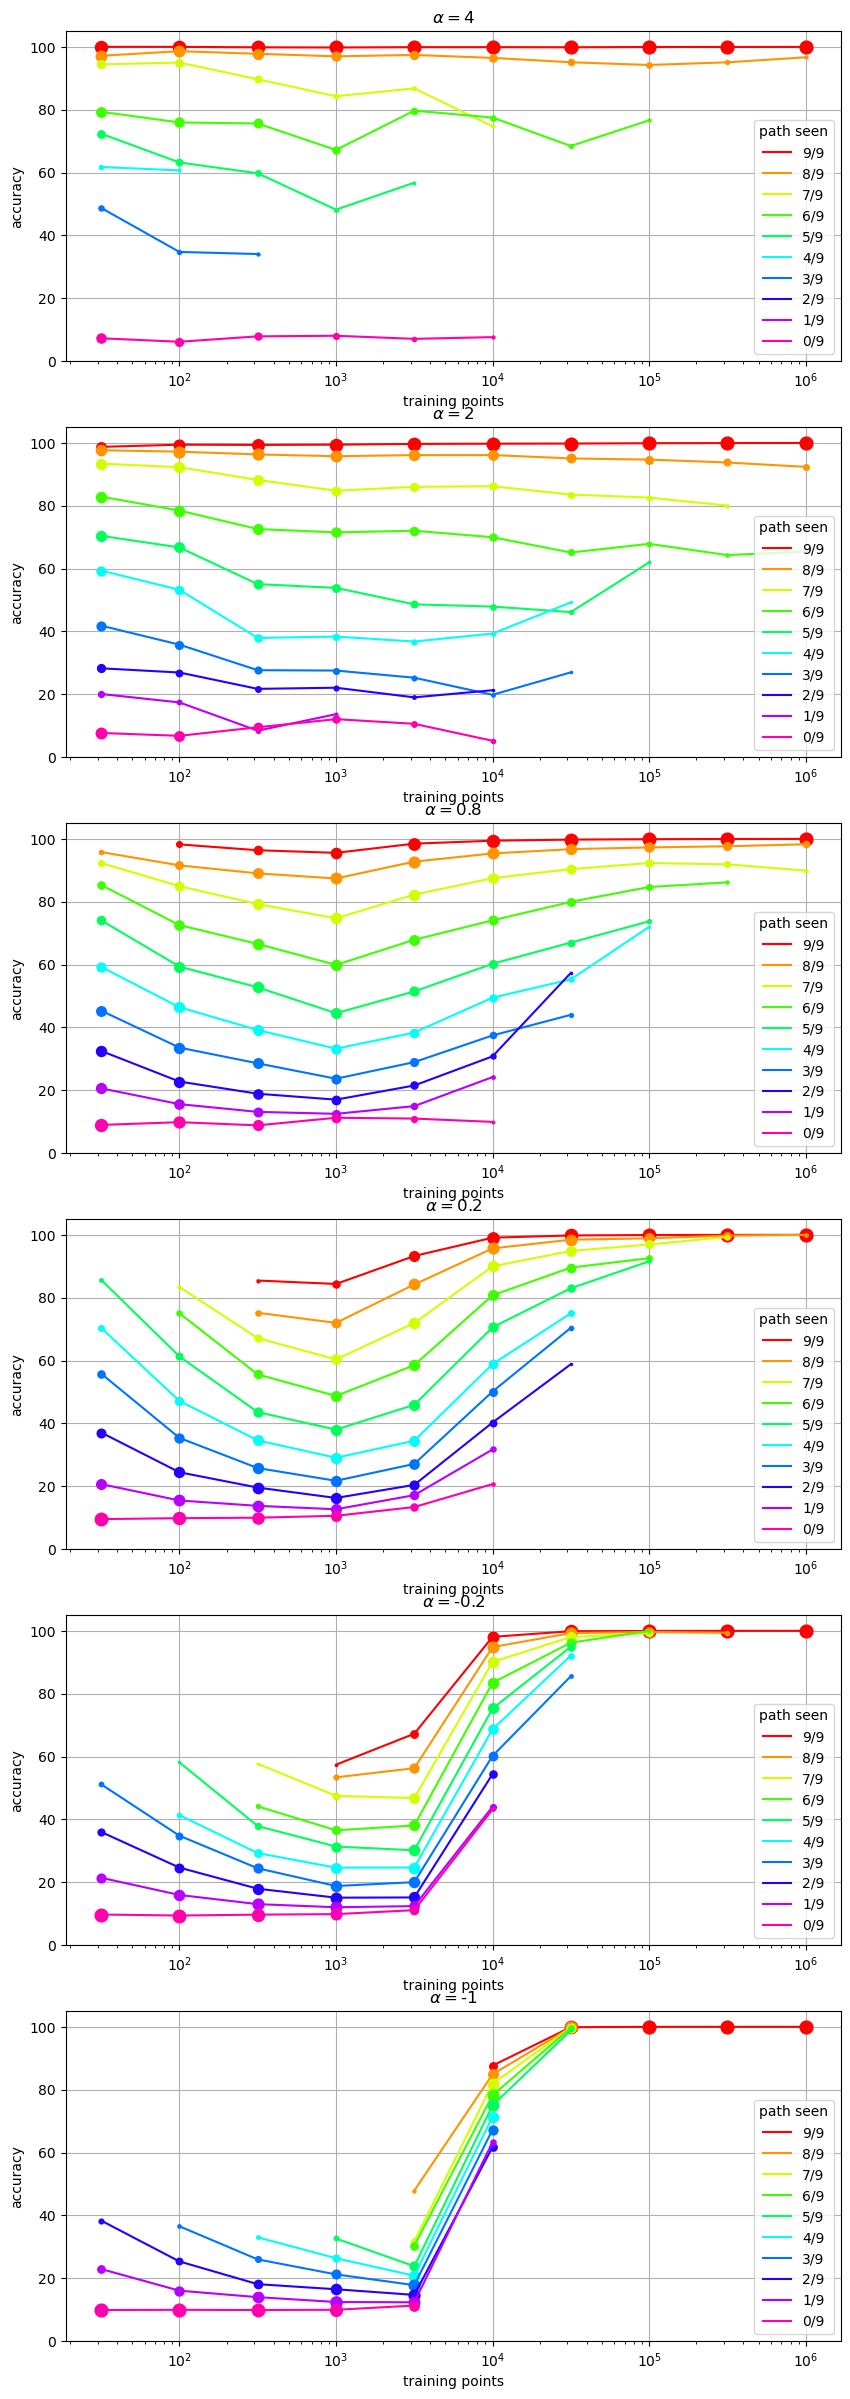

: 

In [10]:
fig, axis = plt.subplots(6, 1, figsize=(10, 30))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
# title_list = ["4/4", "3/4", "2/4", "2/4 in same", "1/4", "0/4"]
title_list = ["9/9", "8/9", "7/9", "6/9", "5/9", "4/9", "3/9", "2/9", "1/9", "0/9"]
for j in range(6):
    for i in range(10):
        data = m10_v10_L3_s3_trial10[j, :, i].numpy()
        marker_size = np.log(m10_v10_L3_s3_trial10_test_size[j, :, i].numpy())
        non_zero_indices = np.where(data != 0)[0]
        bigger_indices = np.where(m10_v10_L3_s3_trial10_test_size[j, :, i] > 4)[0]
        non_zero_indices = np.intersect1d(non_zero_indices, bigger_indices)
        axis[j].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(i/10),label=title_list[i])
        for idx in non_zero_indices:
            axis[j].semilogx(ptr_list[idx], data[idx], color=colormap(i/10),  markersize=marker_size[idx], marker='o')
    axis[j].set_ylim(0, 105)
    axis[j].set_title(r"$\alpha=$"+f"{temperature_list[j]}")
    axis[j].grid()  
    axis[j].set_xlabel("training points")
    axis[j].set_ylabel("accuracy")
    axis[j].legend(title="path seen")
    
    marker_sizes = [5, 4, 3, 2, 1]  # Marker sizes
    corresponding_values = [100, 50, 30, 20, 10]
    for size, value in zip(marker_sizes, corresponding_values):
        axis[j].scatter([], [], s=size**2, label=f'{value}', alpha=0.5)  # Marker size is squared for better visibility



    